### References

- https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/
- https://machinelearningmastery.com/spot-check-classification-machine-learning-algorithms-python-scikit-learn/
- https://machinelearningmastery.com/why-you-should-be-spot-checking-algorithms-on-your-machine-learning-problems/

### Classification Problem

In [1]:
# binary classification spot check script
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

%matplotlib inline

##############################################################
##############################################################

# load the dataset, returns X and y elements
def load_dataset():
    return make_classification(n_samples=1000, n_classes=2, random_state=1)

##############################################################
##############################################################

# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
    
    ####################################
    
    # linear models
    models['logistic'] = LogisticRegression()
    
    alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for a in alpha:
        models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
        
    models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
    models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
    
    ####################################
    
    # non-linear models
    
    n_neighbors = range(1, 21)
    for k in n_neighbors:
        models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
        
    models['cart'] = DecisionTreeClassifier()
    models['extra'] = ExtraTreeClassifier()
    models['svml'] = SVC(kernel='linear')
    models['svmp'] = SVC(kernel='poly')
    
    c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for c in c_values:
        models['svmr'+str(c)] = SVC(C=c)
        
    models['bayes'] = GaussianNB()
    
    ####################################
    
    # ensemble models
    n_trees = 100
    models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
    models['bag'] = BaggingClassifier(n_estimators=n_trees)
    models['rf'] = RandomForestClassifier(n_estimators=n_trees)
    models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
    models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
    
    ####################################
    
    print('Defined %d models' % len(models))
    return models

##############################################################
##############################################################

# create a feature preparation pipeline for a model
def make_pipeline(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline

##############################################################
##############################################################

# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
    # create the pipeline
    pipeline = make_pipeline(model)
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
    return scores

##############################################################
##############################################################

# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
    scores = None
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            scores = evaluate_model(X, y, model, folds, metric)
    except:
        scores = None
    return scores

##############################################################
##############################################################

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
    results = dict()
    for name, model in models.items():
        # evaluate the model
        scores = robust_evaluate_model(X, y, model, folds, metric)
        # show process
        if scores is not None:
            # store a result
            results[name] = scores
            mean_score, std_score = mean(scores), std(scores)
            print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
        else:
            print('>%s: error' % name)
    return results

##############################################################
##############################################################

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
    # check for no results
    if len(results) == 0:
        print('no results')
        return
    # determine how many results to summarize
    n = min(top_n, len(results))
    # create a list of (name, mean(scores)) tuples
    mean_scores = [(k,mean(v)) for k,v in results.items()]
    # sort tuples by mean score
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    # reverse for descending order (e.g. for accuracy)
    if maximize:
        mean_scores = list(reversed(mean_scores))
    # retrieve the top n for summarization
    names = [x[0] for x in mean_scores[:n]]
    scores = [results[x[0]] for x in mean_scores[:n]]
    # print the top n
    print()
    for i in range(n):
        name = names[i]
        mean_score, std_score = mean(results[name]), std(results[name])
        print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
    # boxplot for the top n
    pyplot.boxplot(scores, labels=names)
    _, labels = pyplot.xticks()
    pyplot.setp(labels, rotation=90)
    pyplot.savefig('spotcheck.png')
    plt.show()

##############################################################
##############################################################

# load dataset
X, y = load_dataset()
# get model list
models = define_models()
# evaluate models
results = evaluate_models(X, y, models)
# summarize results
summarize_results(results)

##############################################################
##############################################################


C:\DS_Softwares\anaconda3\envs\tensorflowcpu\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Defined 53 models
>logistic: 0.846 (+/-0.039)
>ridge-0.1: 0.847 (+/-0.037)
>ridge-0.2: 0.847 (+/-0.037)
>ridge-0.3: 0.847 (+/-0.037)
>ridge-0.4: 0.848 (+/-0.038)
>ridge-0.5: 0.848 (+/-0.038)
>ridge-0.6: 0.848 (+/-0.038)
>ridge-0.7: 0.848 (+/-0.038)
>ridge-0.8: 0.848 (+/-0.038)
>ridge-0.9: 0.848 (+/-0.038)
>ridge-1.0: 0.847 (+/-0.038)
>sgd: 0.773 (+/-0.081)
>pa: 0.792 (+/-0.043)
>knn-1: 0.726 (+/-0.042)
>knn-2: 0.688 (+/-0.030)
>knn-3: 0.740 (+/-0.038)
>knn-4: 0.727 (+/-0.027)
>knn-5: 0.767 (+/-0.036)
>knn-6: 0.757 (+/-0.026)
>knn-7: 0.769 (+/-0.037)
>knn-8: 0.762 (+/-0.044)
>knn-9: 0.773 (+/-0.044)
>knn-10: 0.767 (+/-0.042)
>knn-11: 0.783 (+/-0.041)
>knn-12: 0.781 (+/-0.045)
>knn-13: 0.789 (+/-0.041)
>knn-14: 0.787 (+/-0.038)
>knn-15: 0.799 (+/-0.044)
>knn-16: 0.791 (+/-0.039)
>knn-17: 0.799 (+/-0.027)
>knn-18: 0.797 (+/-0.030)
>knn-19: 0.801 (+/-0.031)
>knn-20: 0.802 (+/-0.034)
>cart: 0.806 (+/-0.038)
>extra: 0.711 (+/-0.050)
>svml: 0.843 (+/-0.035)
>svmp: 0.773 (+/-0.034)
>svmr0.1: 0

### Spot-Checking for Regression

In [1]:
# regression spot check script
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

##############################################################
##############################################################

# load the dataset, returns X and y elements
def load_dataset():
    return make_regression(n_samples=1000, n_features=50, noise=0.1, random_state=1)

##############################################################
##############################################################

# create a dict of standard models to evaluate {name:object}
def get_models(models=dict()):
    
    #############################################
    
    # linear models
    models['lr'] = LinearRegression()
    
    alpha = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for a in alpha:
        models['lasso-'+str(a)] = Lasso(alpha=a)
        
    for a in alpha:
        models['ridge-'+str(a)] = Ridge(alpha=a)
        
    for a1 in alpha:
        for a2 in alpha:
            name = 'en-' + str(a1) + '-' + str(a2)
            models[name] = ElasticNet(a1, a2)
            
    models['huber'] = HuberRegressor()
    models['lars'] = Lars()
    models['llars'] = LassoLars()
    models['pa'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
    models['ranscac'] = RANSACRegressor()
    models['sgd'] = SGDRegressor(max_iter=1000, tol=1e-3)
    models['theil'] = TheilSenRegressor()
    
    #############################################
    
    # non-linear models
    n_neighbors = range(1, 21)
    for k in n_neighbors:
        models['knn-'+str(k)] = KNeighborsRegressor(n_neighbors=k)
        
    models['cart'] = DecisionTreeRegressor()
    models['extra'] = ExtraTreeRegressor()
    models['svml'] = SVR(kernel='linear')
    models['svmp'] = SVR(kernel='poly')
    
    c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for c in c_values:
        models['svmr'+str(c)] = SVR(C=c)
        
    #############################################
    
    # ensemble models
    n_trees = 100
    models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
    models['bag'] = BaggingRegressor(n_estimators=n_trees)
    models['rf'] = RandomForestRegressor(n_estimators=n_trees)
    models['et'] = ExtraTreesRegressor(n_estimators=n_trees)
    models['gbm'] = GradientBoostingRegressor(n_estimators=n_trees)
    print('Defined %d models' % len(models))
    return models

##############################################################
##############################################################

# create a feature preparation pipeline for a model
def make_pipeline(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline

##############################################################
##############################################################

# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
    # create the pipeline
    pipeline = make_pipeline(model)
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
    return scores

##############################################################
##############################################################

# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
    scores = None
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            scores = evaluate_model(X, y, model, folds, metric)
    except:
        scores = None
    return scores

##############################################################
##############################################################

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
    results = dict()
    for name, model in models.items():
        # evaluate the model
        scores = robust_evaluate_model(X, y, model, folds, metric)
        # show process
        if scores is not None:
            # store a result
            results[name] = scores
            mean_score, std_score = mean(scores), std(scores)
            print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
        else:
            print('>%s: error' % name)
    return results

##############################################################
##############################################################

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
    # check for no results
    if len(results) == 0:
        print('no results')
        return
    # determine how many results to summarize
    n = min(top_n, len(results))
    # create a list of (name, mean(scores)) tuples
    mean_scores = [(k,mean(v)) for k,v in results.items()]
    # sort tuples by mean score
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    # reverse for descending order (e.g. for accuracy)
    if maximize:
        mean_scores = list(reversed(mean_scores))
    # retrieve the top n for summarization
    names = [x[0] for x in mean_scores[:n]]
    scores = [results[x[0]] for x in mean_scores[:n]]
    # print the top n
    print()
    for i in range(n):
        name = names[i]
        mean_score, std_score = mean(results[name]), std(results[name])
        print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
    # boxplot for the top n
    pyplot.boxplot(scores, labels=names)
    _, labels = pyplot.xticks()
    pyplot.setp(labels, rotation=90)
    pyplot.savefig('spotcheck_regression.png')

##############################################################
##############################################################

# load dataset
X, y = load_dataset()
# get model list
models = get_models()
# evaluate models
results = evaluate_models(X, y, models, metric='neg_mean_squared_error')
# summarize results
summarize_results(results)

##############################################################
##############################################################

C:\DS_Softwares\anaconda3\envs\tensorflowcpu\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Defined 190 models
>lr: -0.011 (+/-0.001)
>lasso-0.0: -0.011 (+/-0.001)
>lasso-0.1: -4.756 (+/-0.808)
>lasso-0.2: -18.996 (+/-3.268)
>lasso-0.3: -42.730 (+/-7.379)
>lasso-0.4: -75.957 (+/-13.144)
>lasso-0.5: -118.679 (+/-20.561)
>lasso-0.6: -170.895 (+/-29.631)
>lasso-0.7: -232.605 (+/-40.354)
>lasso-0.8: -303.810 (+/-52.729)
>lasso-0.9: -384.509 (+/-66.757)
>lasso-1.0: -474.701 (+/-82.438)
>ridge-0.0: -0.011 (+/-0.001)
>ridge-0.1: -0.902 (+/-0.167)
>ridge-0.2: -3.534 (+/-0.668)
>ridge-0.3: -7.847 (+/-1.492)
>ridge-0.4: -13.780 (+/-2.628)
>ridge-0.5: -21.277 (+/-4.064)
>ridge-0.6: -30.283 (+/-5.788)
>ridge-0.7: -40.744 (+/-7.790)
>ridge-0.8: -52.610 (+/-10.059)
>ridge-0.9: -65.831 (+/-12.586)
>ridge-1.0: -80.359 (+/-15.361)
>en-0.0-0.0: -0.011 (+/-0.001)
>en-0.0-0.1: -0.011 (+/-0.001)
>en-0.0-0.2: -0.011 (+/-0.001)
>en-0.0-0.3: -0.011 (+/-0.001)
>en-0.0-0.4: -0.011 (+/-0.001)
>en-0.0-0.5: -0.011 (+/-0.001)
>en-0.0-0.6: -0.011 (+/-0.001)
>en-0.0-0.7: -0.011 (+/-0.001)
>en-0.0-0.8: -0.01

### Framework Extension

#### Course Grid Search for Gradient Boosting

Defined 53 models
Defined 107 models
>0logistic: 0.847 (+/-0.037)
>1logistic: 0.847 (+/-0.037)
>2logistic: 0.846 (+/-0.039)
>3logistic: 0.846 (+/-0.039)
>0ridge-0.1: 0.846 (+/-0.037)
>1ridge-0.1: 0.846 (+/-0.037)
>2ridge-0.1: 0.847 (+/-0.037)
>3ridge-0.1: 0.847 (+/-0.037)
>0ridge-0.2: 0.846 (+/-0.037)
>1ridge-0.2: 0.846 (+/-0.037)
>2ridge-0.2: 0.847 (+/-0.037)
>3ridge-0.2: 0.847 (+/-0.037)
>0ridge-0.3: 0.846 (+/-0.037)
>1ridge-0.3: 0.846 (+/-0.037)
>2ridge-0.3: 0.847 (+/-0.037)
>3ridge-0.3: 0.847 (+/-0.037)
>0ridge-0.4: 0.846 (+/-0.037)
>1ridge-0.4: 0.846 (+/-0.037)
>2ridge-0.4: 0.848 (+/-0.038)
>3ridge-0.4: 0.848 (+/-0.038)
>0ridge-0.5: 0.846 (+/-0.037)
>1ridge-0.5: 0.846 (+/-0.037)
>2ridge-0.5: 0.848 (+/-0.038)
>3ridge-0.5: 0.848 (+/-0.038)
>0ridge-0.6: 0.846 (+/-0.037)
>1ridge-0.6: 0.846 (+/-0.037)
>2ridge-0.6: 0.848 (+/-0.038)
>3ridge-0.6: 0.848 (+/-0.038)
>0ridge-0.7: 0.846 (+/-0.037)
>1ridge-0.7: 0.846 (+/-0.037)
>2ridge-0.7: 0.848 (+/-0.038)
>3ridge-0.7: 0.848 (+/-0.038)
>0ridge

>3xgb-[0.001, 100, 0.7, 7]: 0.859 (+/-0.039)
>0xgb-[0.001, 100, 0.7, 9]: 0.860 (+/-0.038)
>1xgb-[0.001, 100, 0.7, 9]: 0.860 (+/-0.038)
>2xgb-[0.001, 100, 0.7, 9]: 0.860 (+/-0.038)
>3xgb-[0.001, 100, 0.7, 9]: 0.860 (+/-0.038)
>0xgb-[0.001, 100, 1.0, 3]: 0.860 (+/-0.047)
>1xgb-[0.001, 100, 1.0, 3]: 0.860 (+/-0.047)
>2xgb-[0.001, 100, 1.0, 3]: 0.860 (+/-0.047)
>3xgb-[0.001, 100, 1.0, 3]: 0.860 (+/-0.047)
>0xgb-[0.001, 100, 1.0, 7]: 0.847 (+/-0.032)
>1xgb-[0.001, 100, 1.0, 7]: 0.847 (+/-0.032)
>2xgb-[0.001, 100, 1.0, 7]: 0.847 (+/-0.032)
>3xgb-[0.001, 100, 1.0, 7]: 0.847 (+/-0.032)
>0xgb-[0.001, 100, 1.0, 9]: 0.845 (+/-0.033)
>1xgb-[0.001, 100, 1.0, 9]: 0.845 (+/-0.033)
>2xgb-[0.001, 100, 1.0, 9]: 0.845 (+/-0.033)
>3xgb-[0.001, 100, 1.0, 9]: 0.845 (+/-0.033)
>0xgb-[0.01, 50, 0.5, 3]: 0.860 (+/-0.035)
>1xgb-[0.01, 50, 0.5, 3]: 0.860 (+/-0.035)
>2xgb-[0.01, 50, 0.5, 3]: 0.860 (+/-0.035)
>3xgb-[0.01, 50, 0.5, 3]: 0.860 (+/-0.035)
>0xgb-[0.01, 50, 0.5, 7]: 0.863 (+/-0.040)
>1xgb-[0.01, 50, 0.5

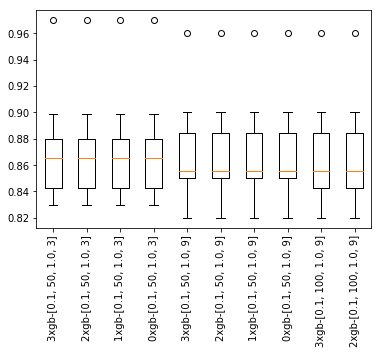

In [4]:
#### Classification

# binary classification spot check script
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

%matplotlib inline

##############################################################
##############################################################

# load the dataset, returns X and y elements
def load_dataset():
    return make_classification(n_samples=1000, n_classes=2, random_state=1)

##############################################################
##############################################################

# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
    
    ####################################
    
    # linear models
    models['logistic'] = LogisticRegression()
    
    alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for a in alpha:
        models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
        
    models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
    models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
    
    ####################################
    
    # non-linear models
    
    n_neighbors = range(1, 21)
    for k in n_neighbors:
        models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
        
    models['cart'] = DecisionTreeClassifier()
    models['extra'] = ExtraTreeClassifier()
    models['svml'] = SVC(kernel='linear')
    models['svmp'] = SVC(kernel='poly')
    
    c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for c in c_values:
        models['svmr'+str(c)] = SVC(C=c)
        
    models['bayes'] = GaussianNB()
    
    ####################################
    
    # ensemble models
    n_trees = 100
    models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
    models['bag'] = BaggingClassifier(n_estimators=n_trees)
    models['rf'] = RandomForestClassifier(n_estimators=n_trees)
    models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
    models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
    
    ####################################
    
    print('Defined %d models' % len(models))
    return models

##############################################################
##############################################################

# define gradient boosting models
def define_gbm_models(models=dict(), use_xgb=True):
    # define config ranges
    rates = [0.001, 0.01, 0.1]
    trees = [50, 100]
    ss = [0.5, 0.7, 1.0]
    depth = [3, 7, 9]
    # add configurations
    for l in rates:
        for e in trees:
            for s in ss:
                for d in depth:
                    cfg = [l, e, s, d]
                    if use_xgb:
                        name = 'xgb-' + str(cfg)
                        models[name] = XGBClassifier(learning_rate=l, n_estimators=e, subsample=s, max_depth=d)
                    else:
                        name = 'gbm-' + str(cfg)
                        models[name] = GradientBoostingClassifier(learning_rate=l, n_estimators=e, subsample=s, max_depth=d)
    print('Defined %d models' % len(models))
    return models

##############################################################
##############################################################

# create a feature preparation pipeline for a model
def make_pipeline(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline

# no transforms pipeline
def pipeline_none(model):
    return model
 
# standardize transform pipeline
def pipeline_standardize(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline
 
# normalize transform pipeline
def pipeline_normalize(model):
    steps = list()
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline
 
# standardize and normalize pipeline
def pipeline_std_norm(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline

##############################################################
##############################################################

# evaluate a single model
def evaluate_model(X, y, model, folds, metric, pipe_func):
    # create the pipeline
    pipeline = pipe_func(model)
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
    return scores

##############################################################
##############################################################

# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric, pipe_func):
    scores = None
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            scores = evaluate_model(X, y, model, folds, metric, pipe_func)
    except:
        scores = None
    return scores

##############################################################
##############################################################

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, pipe_funcs, folds=10, metric='accuracy'):
    results = dict()
    for name, model in models.items():
        # evaluate model under each preparation function
        for i in range(len(pipe_funcs)):
            # evaluate the model
            scores = robust_evaluate_model(X, y, model, folds, metric, pipe_funcs[i])
            # update name
            run_name = str(i) + name
            # show process
            if scores is not None:
                # store a result
                results[run_name] = scores
                mean_score, std_score = mean(scores), std(scores)
                print('>%s: %.3f (+/-%.3f)' % (run_name, mean_score, std_score))
            else:
                print('>%s: error' % run_name)
    return results

##############################################################
##############################################################

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
    # check for no results
    if len(results) == 0:
        print('no results')
        return
    # determine how many results to summarize
    n = min(top_n, len(results))
    # create a list of (name, mean(scores)) tuples
    mean_scores = [(k,mean(v)) for k,v in results.items()]
    # sort tuples by mean score
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    # reverse for descending order (e.g. for accuracy)
    if maximize:
        mean_scores = list(reversed(mean_scores))
    # retrieve the top n for summarization
    names = [x[0] for x in mean_scores[:n]]
    scores = [results[x[0]] for x in mean_scores[:n]]
    # print the top n
    print()
    for i in range(n):
        name = names[i]
        mean_score, std_score = mean(results[name]), std(results[name])
        print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
    # boxplot for the top n
    pyplot.boxplot(scores, labels=names)
    _, labels = pyplot.xticks()
    pyplot.setp(labels, rotation=90)
    pyplot.savefig('spotcheck_classification_extension.png')

##############################################################
##############################################################

# load dataset
X, y = load_dataset()

# get model list
models = define_models()

# add gbm models
models = define_gbm_models(models)

# define transform pipelines
pipelines = [pipeline_none, pipeline_standardize, pipeline_normalize, pipeline_std_norm]

# evaluate models
results = evaluate_models(X, y, models, pipelines)

# summarize results
summarize_results(results)

##############################################################
##############################################################
